In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [6]:
sb.set()

In [7]:
filename = "C:/Users/FAIZ007/Desktop/train.csv"

In [8]:
traindf = pd.read_csv(filename)

In [9]:
print(traindf.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [10]:
newdf = traindf.select_dtypes("int64")

In [11]:
print(newdf.columns)
print(newdf.head(15))

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
    Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0    1          60     8450            7            5       2003   
1    2          20     9600            6            8       1976   
2    3          60    11250            7            5       2001   
3    4          70     9550            7            5       1915   
4    5          60    14260            8            5       2000   
5    6          50    14115            5     

In [12]:
newdf = newdf.drop(columns=['MSSubClass', 'OverallQual', 'OverallCond'])

In [13]:
print(newdf.columns)

Index(['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [14]:
salePrice = newdf.SalePrice

In [15]:
print(salePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<AxesSubplot:>

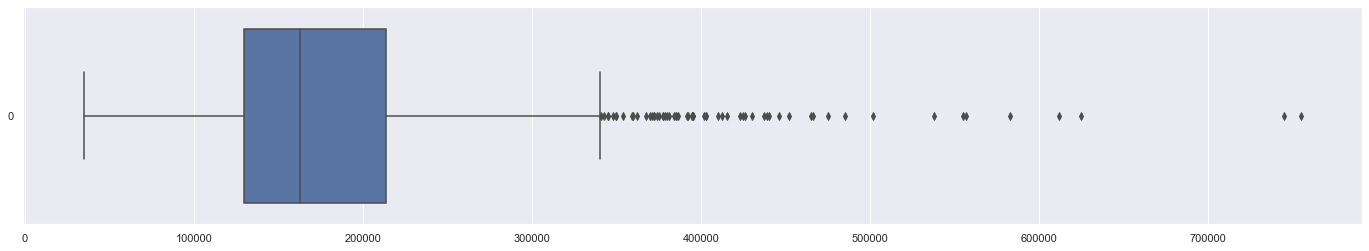

In [16]:
f = plt.figure(figsize=(24,4))
sb.boxplot(data = salePrice, orient = "h")

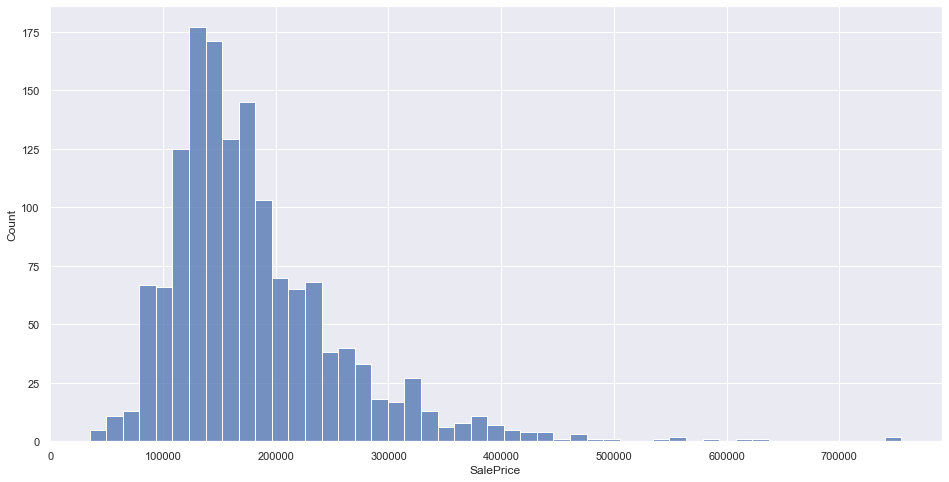

In [13]:
f = plt.figure(figsize=(16,8))
sb.histplot(data = salePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

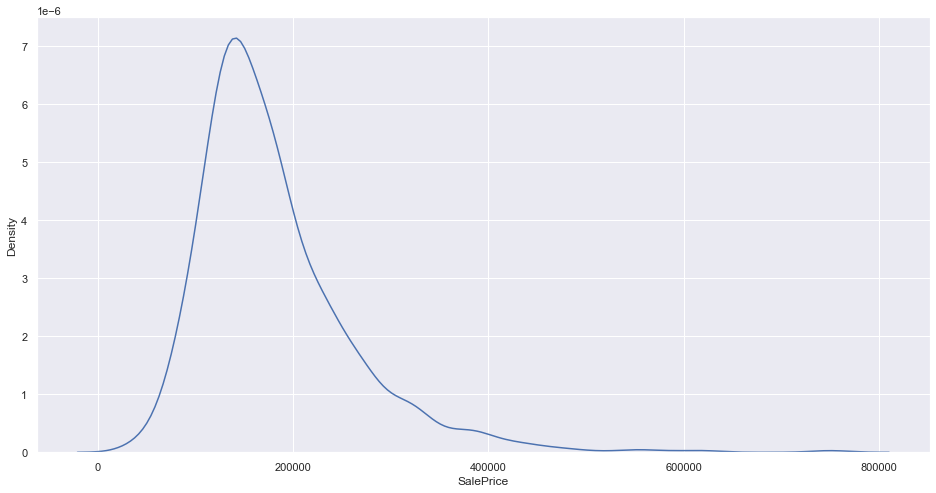

In [17]:
f =plt.figure(figsize=(16,8))
sb.kdeplot(data = salePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

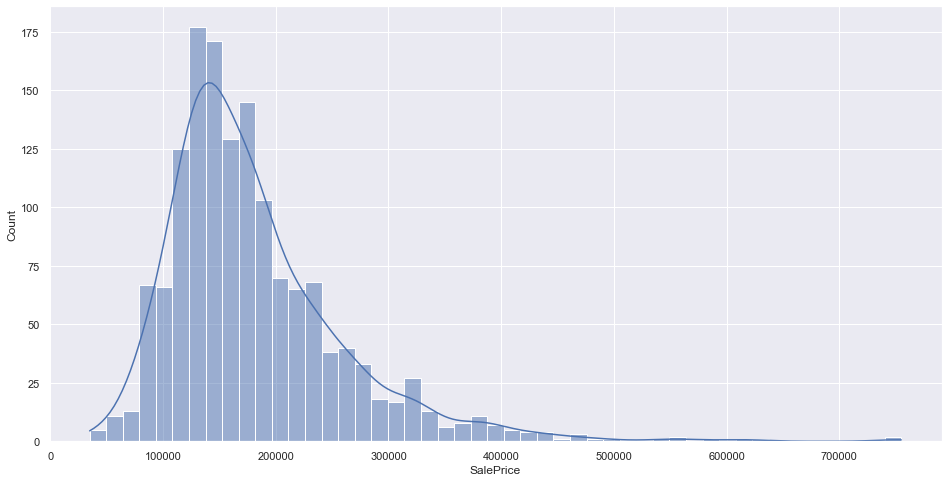

In [18]:
f =plt.figure(figsize=(16,8))
sb.histplot(data = salePrice, kde = True)

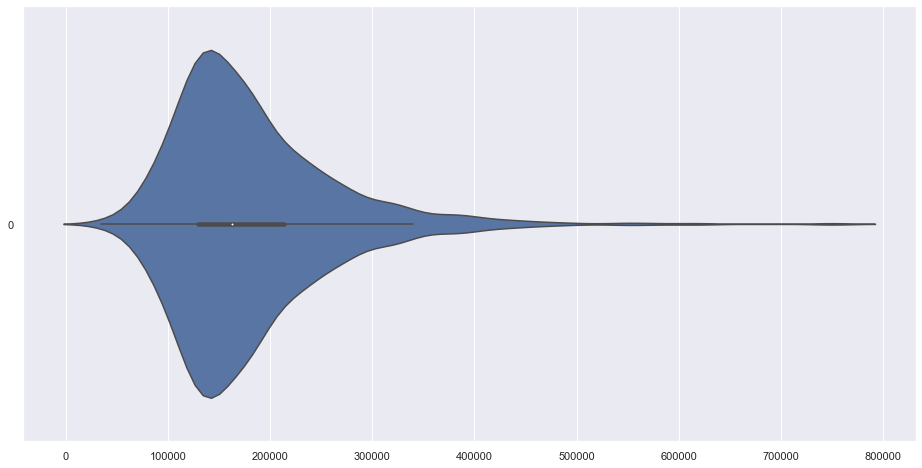

In [16]:
f =plt.figure(figsize=(16,8))
sb.violinplot(data = salePrice, orient = "h")

In [17]:
lotArea = newdf.LotArea

In [18]:
lotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

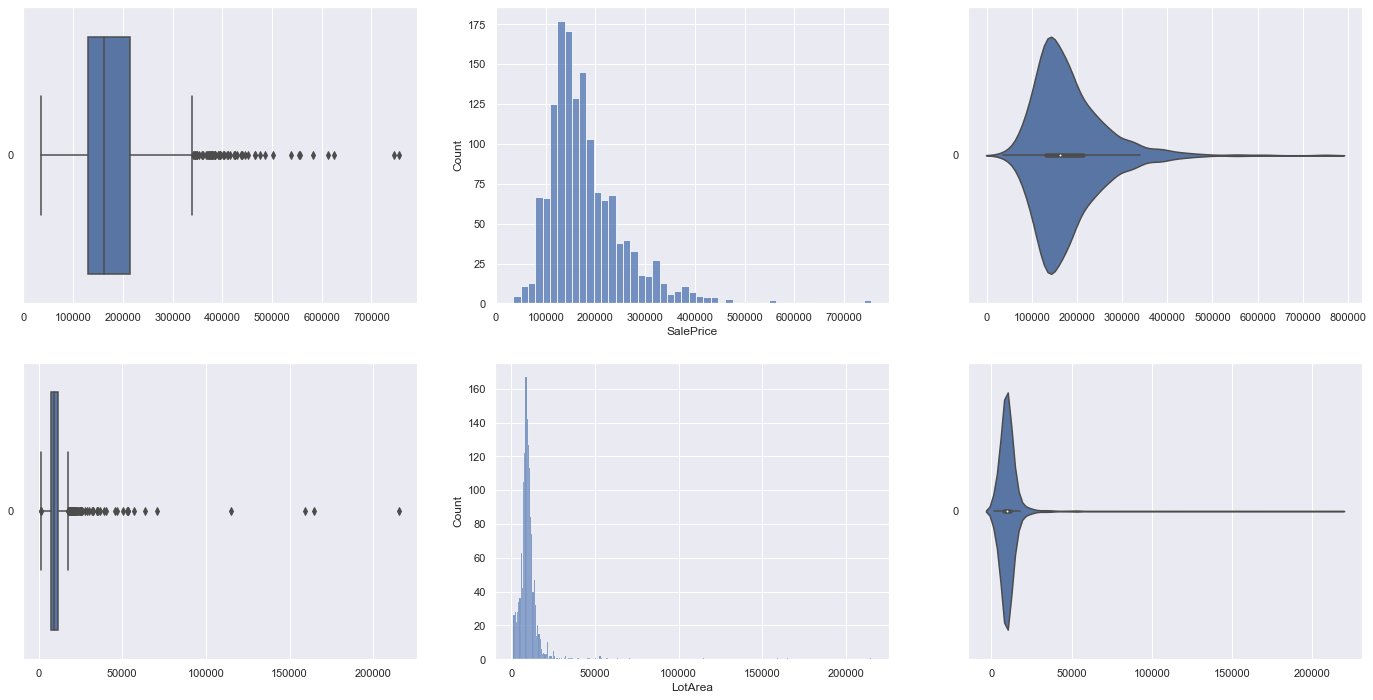

In [19]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = salePrice, orient = "h", ax = axes[0,0])
sb.histplot(data = salePrice, ax = axes[0,1])
sb.violinplot(data = salePrice, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = lotArea, orient = "h", ax = axes[1,0])
sb.histplot(data = lotArea, ax = axes[1,1])
sb.violinplot(data = lotArea, orient = "h", ax = axes[1,2])

In [20]:
jointDF = pd.concat([salePrice, lotArea], axis = 1).reindex(lotArea.index)

In [21]:
jointDF

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


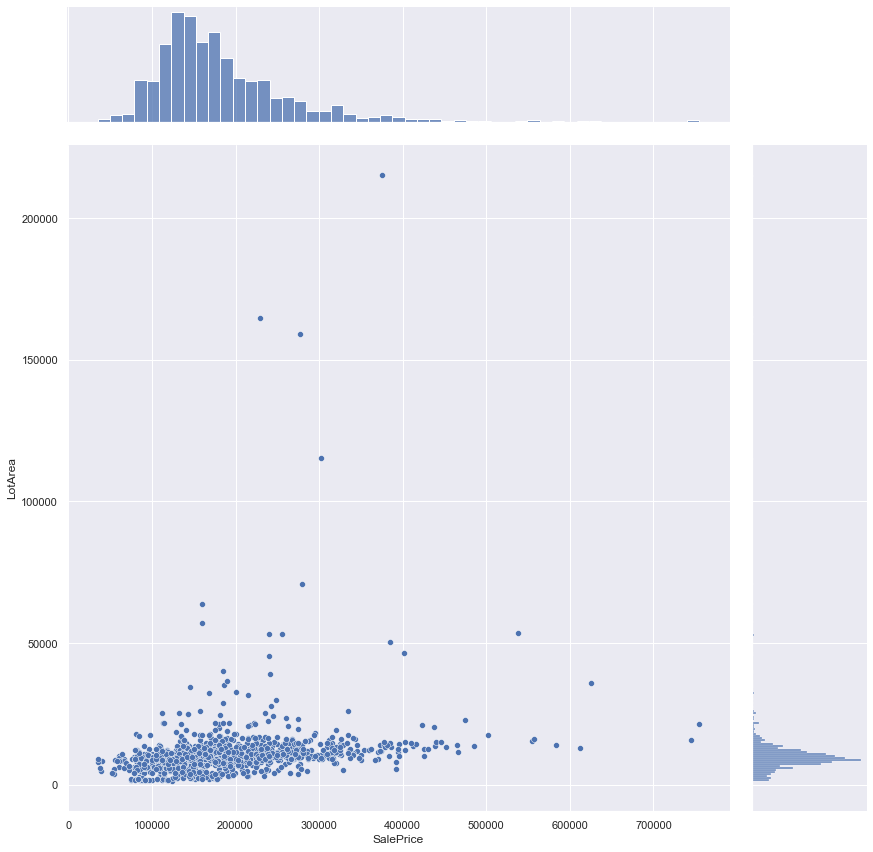

In [26]:
sb.jointplot(data = jointDF, x = "SalePrice", y = "LotArea", height = 12)

In [27]:
jointDF.corr()

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


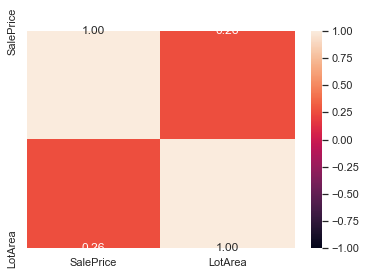

In [28]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [29]:
multiDF = pd.DataFrame(newdf[["LotArea", "Fireplaces", "GarageArea", "PoolArea", "YearBuilt", "YrSold"]])

In [30]:
multiDF.describe()

,LotArea,Fireplaces,GarageArea,PoolArea,YearBuilt,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,0.613014,472.980137,2.758904,1971.267808,2007.815753
std,9981.264932,0.644666,213.804841,40.177307,30.202904,1.328095
min,1300.000000,0.000000,0.000000,0.000000,1872.000000,2006.000000
25%,7553.500000,0.000000,334.500000,0.000000,1954.000000,2007.000000
50%,9478.500000,1.000000,480.000000,0.000000,1973.000000,2008.000000
75%,11601.500000,1.000000,576.000000,0.000000,2000.000000,2009.000000
max,215245.000000,3.000000,1418.000000,738.000000,2010.000000,2010.000000


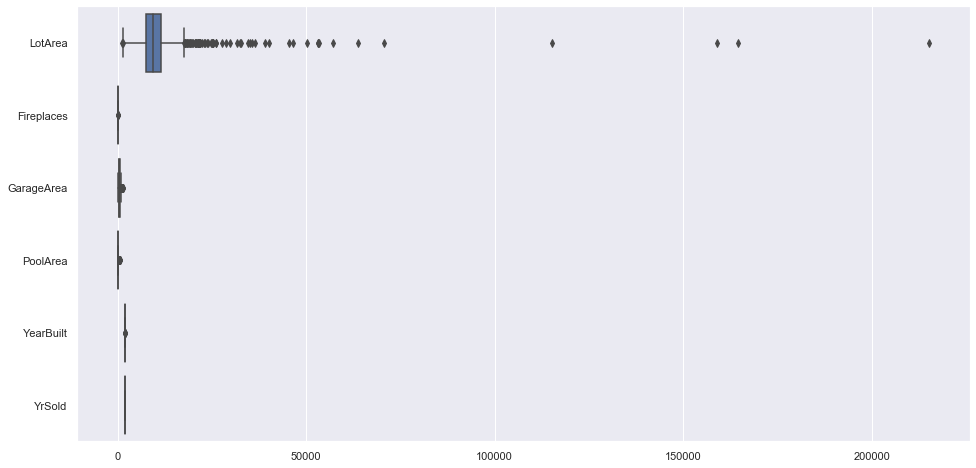

In [31]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = multiDF, orient = "h")

In [ ]:
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in multiDF:
    sb.boxplot(data = multiDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = multiDF[var], ax = axes[count,1])
    sb.violinplot(data = multiDF[var], orient = "h", ax = axes[count,2])
    count += 1

In [35]:
multiDF.corr()

,LotArea,Fireplaces,GarageArea,PoolArea,YearBuilt,YrSold
LotArea,1.000000,0.271364,0.180403,0.077672,0.014228,-0.014261
Fireplaces,0.271364,1.000000,0.269141,0.095074,0.147716,-0.024096
GarageArea,0.180403,0.269141,1.000000,0.061047,0.478954,-0.027378
PoolArea,0.077672,0.095074,0.061047,1.000000,0.004950,-0.059689
YearBuilt,0.014228,0.147716,0.478954,0.004950,1.000000,-0.013618
YrSold,-0.014261,-0.024096,-0.027378,-0.059689,-0.013618,1.000000


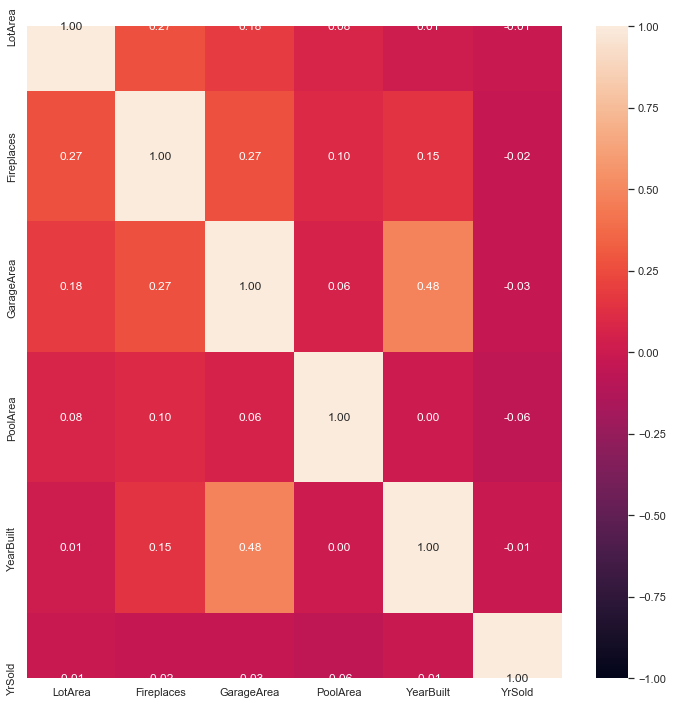

In [36]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(multiDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")       

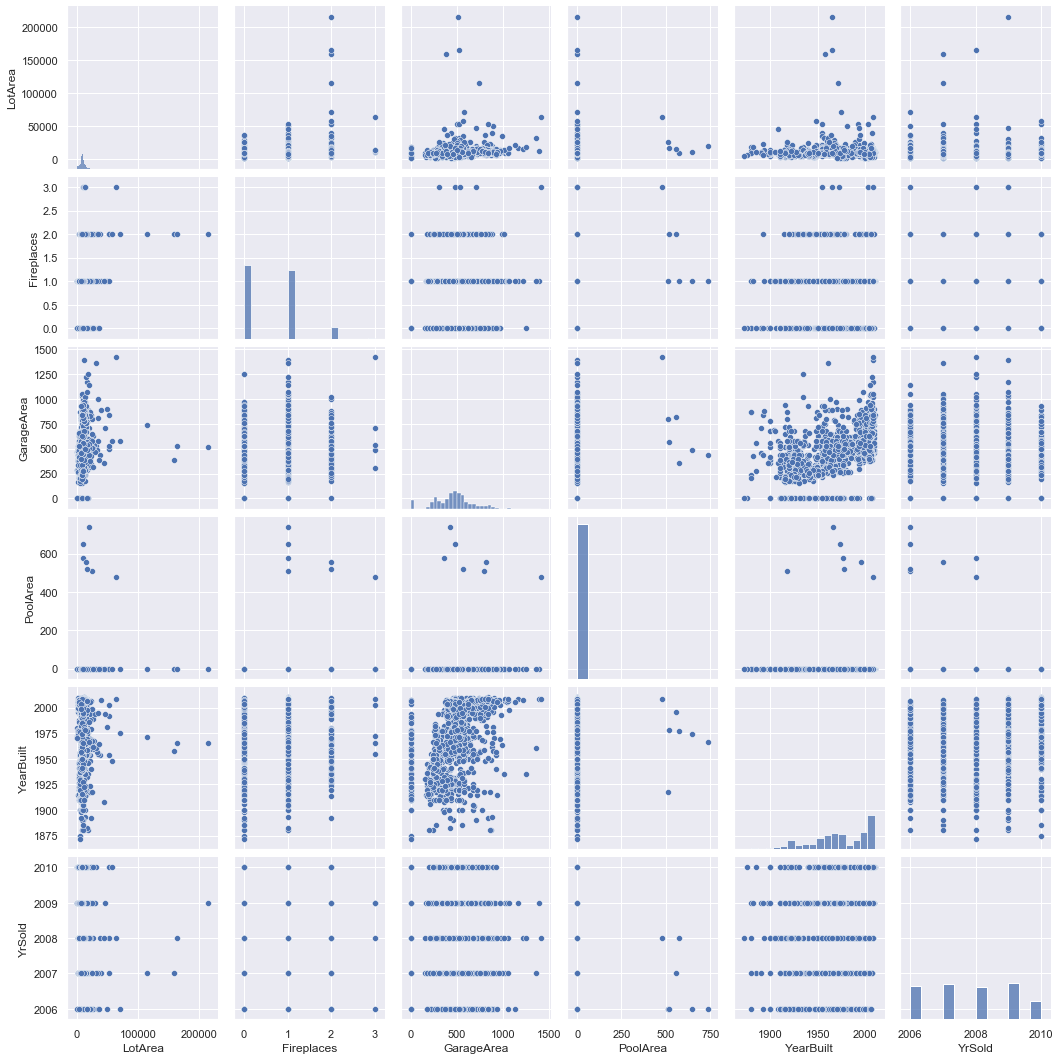

In [37]:
sb.pairplot(data = multiDF)